<a href="https://colab.research.google.com/github/ximesaav04/ConnectaTel/blob/main/ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users

print(users.isna().sum())
print(users.isna().mean())


user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?


**USERS**
- City: el 11.7% de los valores son nulos, se debe investigar el caso para determinar si se imputa o se deja como nulo. Puede ser información importante para análisis o segmentación geográfica.
- Churn_date: el 88.4% de los valores son nulos, es un alto porcentaje, se ignora y se dejan nulos. Tiene sentido su alto porcentaje, puede indicar que a la mayoria de las personas que se les ha acabado el plan, han decidido no renovar

**USAGE**
- Date: el 0.13% de los valores son nulos, es una cantidad mínima por lo que se dejan nulos.
- Duration: el 55.19% de los valores son nulos, se debe investigar el caso para determinar si se imputa o se deja como nulo. Puede resultar información valiosa para análisis
- Length: el 44.74% de los valores son nulos, se debe investigar el caso para ver si se imputa o se deja como nulo. Puede resultar información valiosa para análisis

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users.describe()


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` tiene 4,000 registros completos, mostrando un rango exacto que va desde el 10,000 hasta el 13,999. Estadísticamente, presenta una distribución simétrica, ya que su media (11,999.5) coincide con su mediana. No se observan anomalías, valores nulos ni errores de duplicidad a simple vista
  
- La columna `age` muestra presencia de valores inconsistentes como -999. Esto provoca que la media (33.7) esté artificialmente desplazada hacia abajo respecto a la mediana (47.0), y genera una desviación estándar extremadamente alta (123.23) que no guarda relación con el rango biológico real de los usuarios (máximo de 79 años).

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- La columna `id` cuenta los registros del 1 al 40.000
- La columna `user_id` identifica a los usuarios del 10,000 al 13,999.
- La columna `duration` hay alrededor de 18,000 registros de los 40,000 posibles. La mayoría de los valores son pequeños (la mitad están por debajo de 3.5), pero hay un valor máximo de 120 que es muy alto y se sale de lo normal, lo que indica que hay algunos casos excepcionales.
- La columna `length` también faltan casi la mitad de los 40.000 registros posibles. Es la columna con más variedad de números; aunque la mayoría de los registros miden cerca de 50, hay un valor máximo de 1490 que es extremadamente grande comparado con el resto.

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

for col in columnas_user:
    print(f"=== {col.upper()} ===")
    print(users[col].value_counts())
    print()


=== CITY ===
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

=== PLAN ===
Basico     2595
Premium    1405
Name: plan, dtype: int64




- La columna `city` se encontraron 96 entradas sin clasificación de ciudad
- La columna `plan` se encontraron 2.595 en plan Básico y 1.405 en plan Premium


In [ ]:
# explorar columna categórica de usage
usage['type'].value_counts()

text    22092
call    17908
Name: type, dtype: int64

- La columna `type` se encontraron 22.092 en texto y 17.908 llamadas

---

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
*¿En qué columnas encontraste valores inválidos o sentinels?*
- Columna `age`: valor invalido (-999) lo que ha interferido en los demás valores
- Columna `city`: se encuentra el simbolo (?) con 96 entradas

*¿Qué acción tomarías?*
- Reemplazo por NaN
- Estandarización
- Imputación o eliminación

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [ ]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, hay 1.330 del 2024, 1.316 del 2023, 1.314 del 2022 y 40 del 2026

In [ ]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts()

2024.0    39950
Name: date, dtype: int64

En `date`, hay solo entradas del año 2024, 39.950
Basaremos el análisis en estas fechas.


✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
*¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)*
- A simple vista no se evidencian años imposibles. Se encuentran años entre 2022 y 2026. Teniendo en cuenta que estamos trabajando con datos históricos registrados hasta el año 2024, los de 2026 no se tomarán en cuenta.
- En la columna `date` de usage, se encuentran registros únicamente del año 2024

*¿Qué harías con ellas?*
- Reemplazo por NaN
- Estandarización
- Imputación o eliminación

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].replace(-999, np.nan).median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city']= users['city'].replace('?', np.nan)

# Verificar cambios
users['city'].value_counts()

Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [ ]:

# Marcar fechas futuras como NA para reg_date
from datetime import datetime

fecha_limite = datetime (2024, 12, 31)
users.loc[users["reg_date"] > fecha_limite, "reg_date"] = pd.NaT

# Verificar cambios
users["reg_date"].dt.year.value_counts().sort_index()


2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration

for tipo in usage['type'].unique():
    subset = usage[usage['type'] == tipo]
    nulos = subset['duration'].isnull().sum()
    total = len(subset)
    porcentaje = (nulos / total) * 100
    print(f"Tipo {tipo}: {porcentaje:.1f}% de nulos")


Tipo call: 0.0% de nulos
Tipo text: 99.9% de nulos


In [ ]:
# Verificación MAR en usage (Missing At Random) para length

for tipo in usage['type'].unique():
    subset = usage[usage['type'] == tipo]
    nulos = subset['length'].isnull().sum()
    total = len(subset)
    porcentaje = (nulos / total) * 100
    print(f"Tipo {tipo}: {porcentaje:.1f}% de nulos")

Tipo call: 99.9% de nulos
Tipo text: 0.0% de nulos


Los nulos presentes en `duration` y `length` dependen completamente de la columna `type`, por lo tanto, se mantienen nulos. En `duration` solo es relevante para llamadas, mientras que en `length` solo son relevantes para textos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas
usage["call_duration"]= usage["duration"].fillna(0)

# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'call_duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,call_duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas

usage_agg= usage_agg.rename(columns={
    'is_text':'cant_mensajes',
    'is_call':'cant_llamadas',
    'call_duration':'cant_minutos_llamada'
})

# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on='user_id', how='inner')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,5,10,33.18,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,23.317054,48.138285
std,1154.898108,2.358416,2.144238,18.168095,17.691541
min,10000.000000,0.000000,0.000000,0.000000,18.000000
25%,10999.500000,4.000000,3.000000,11.120000,33.000000
50%,12000.000000,5.000000,4.000000,19.780000,48.000000
75%,12999.500000,7.000000,6.000000,31.415000,63.000000
max,13999.000000,17.000000,15.000000,155.690000,79.000000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)*100

Basico     64.866217
Premium    35.133783
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuario
s Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

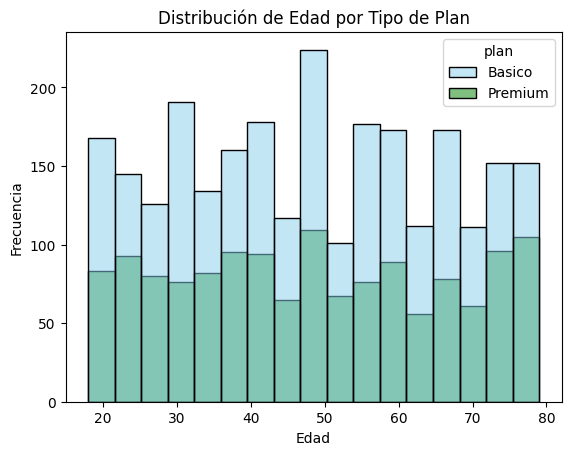

In [ ]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue', 'green'])
plt.title('Distribución de Edad por Tipo de Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- En general, el plan Básico es adquirido por aproximadamente el doble de usuarios que el plan Premium.
- Tanto en el plan Básico como en el Premium, la edad de los usuarios se distribuye a lo largo de un rango amplio (aprox. de 18 a 80 años), lo que indica que ambos planes atraen usuarios de distintas edades; sin embargo, en ambos planes se observa una mayor concentración alrededor de los 50 años.
- La distribución de la edad no es claramente normal; presenta una apariencia ligeramente dispersa y casi simétrica, sin un sesgo marcado hacia la derecha ni hacia la izquierda.

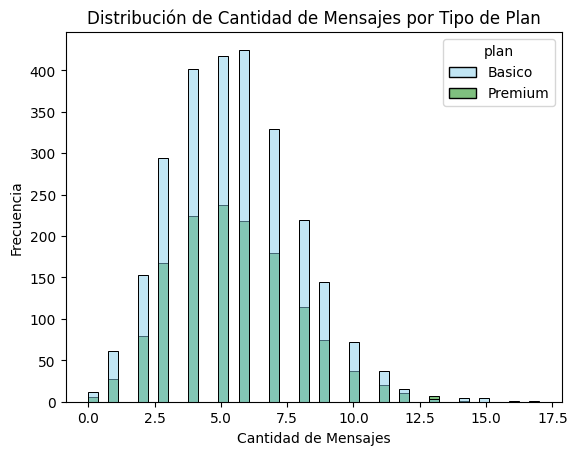

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue', 'green'])
plt.title('Distribución de Cantidad de Mensajes por Tipo de Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- El plan Básico presenta una mayor frecuencia de usuarios que el plan Premium en casi todos los niveles de mensajes enviados.
- Ambos planes muestran una concentración principal entre 4 y 6 mensajes, sin diferencias marcadas en el patrón de uso.
- Distribución ligeramente sesgada a la derecha

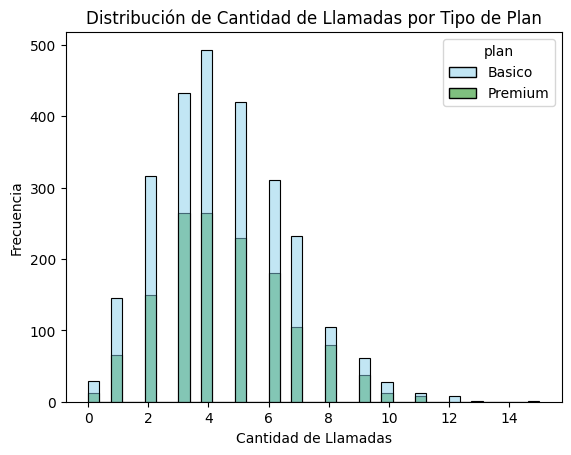

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue', 'green'])
plt.title('Distribución de Cantidad de Llamadas por Tipo de Plan')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- El plan Básico mantiene una mayor frecuencia de usuarios frente al plan Premium en la mayoría de los rangos de llamadas.
- En ambos planes, la mayor concentración se encuentra entre 3 y 5 llamadas, lo que indica un comportamiento de uso similar.
- Distribución sesgada a la derecha

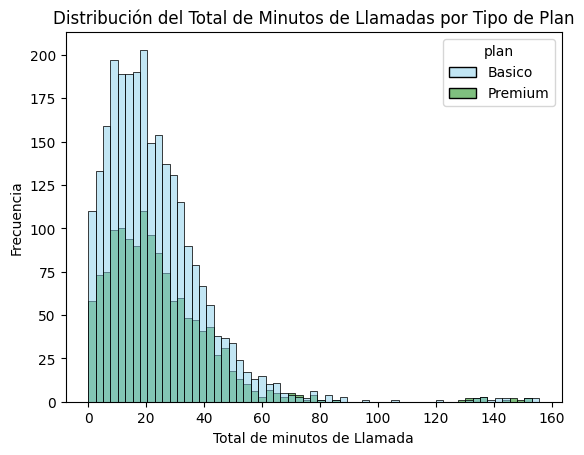

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue', 'green'])
plt.title('Distribución del Total de Minutos de Llamadas por Tipo de Plan')
plt.xlabel('Total de minutos de Llamada')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- El plan Básico concentra un mayor número de usuarios con bajos y medios niveles de consumo de minutos en comparación con el plan Premium.
- En ambos planes, la mayoría de los usuarios acumula menos de 40 minutos, mientras que existen pocos casos con consumos muy altos.
- Distribución sesgada a la derecha



### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers,
crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

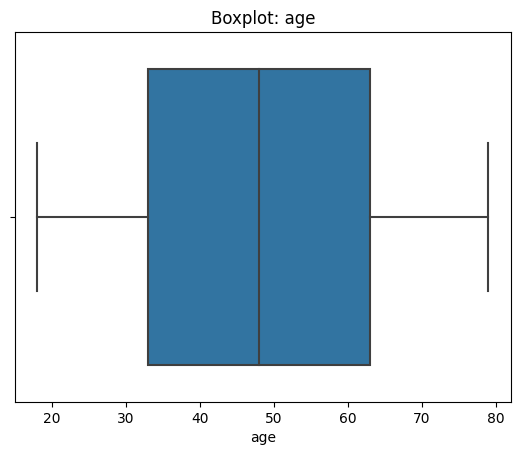

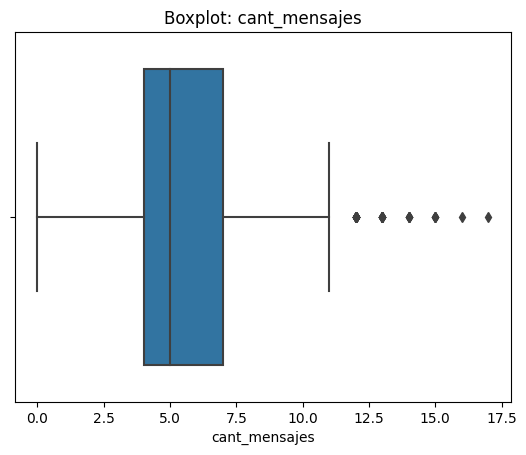

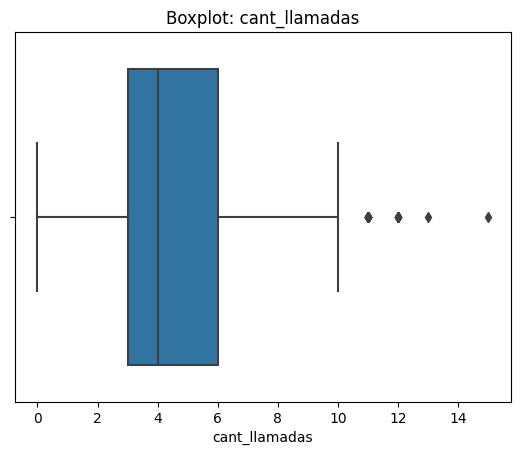

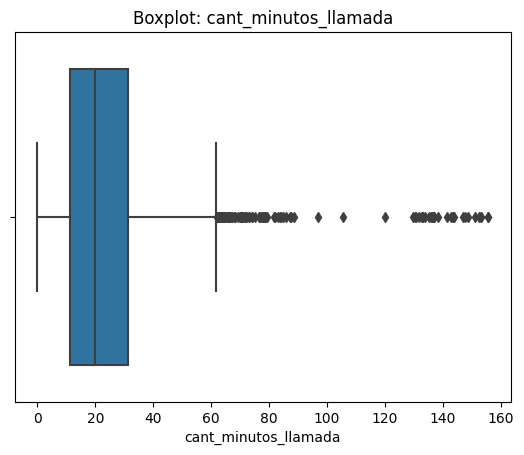

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()


💡Insights:
- Age: no presenta outliers
- cant_mensajes: presenta outliers superiores
- cant_llamadas: presenta outliers superiores
- cant_minutos_llamada: presenta outliers superiores

In [ ]:
# Calcular límites con el método IQR
columnas_limites = {}

for col in columnas_numericas:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR


columnas_limites[col]= {
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }


In [ ]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_minutos_llamada
count,3999.000000
mean,23.317054
std,18.168095
min,0.000000
25%,11.120000
50%,19.780000
75%,31.415000
max,155.690000


💡Insights:
- cant_mensajes: mantener outliers. Los valores altos representan usuarios más activos, pero siguen siendo realistas y coherentes con el comportamiento esperado. Eliminarlos haría perder información valiosa sobre usuarios intensivos.
- cant_llamadas: mantener outliers. No se observan valores exagerados; los casos altos reflejan un segmento legítimo de usuarios con mayor frecuencia de llamadas.
- cant_minutos_llamada: se debe revisar, presenta valores extremos que podrían afectar el análisis.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'Bajo uso',
    np.where(
        (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
        'Uso medio',
        'Alto uso'
    )
)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad

user_profile['grupo_edad'] = np.where(
    user_profile['age'] < 30,
    'Joven',
    np.where(
        user_profile['age'] < 60,
        'Adulto',
        'Adulto Mayor'
    )
)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio,Adulto
1,10001,5,10,33.18,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

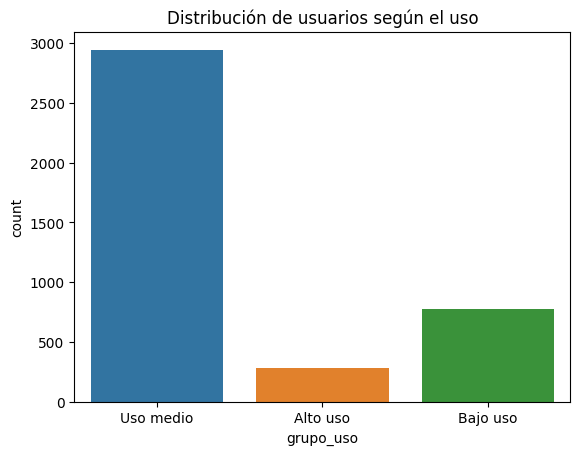

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución de usuarios según el uso')
plt.show()

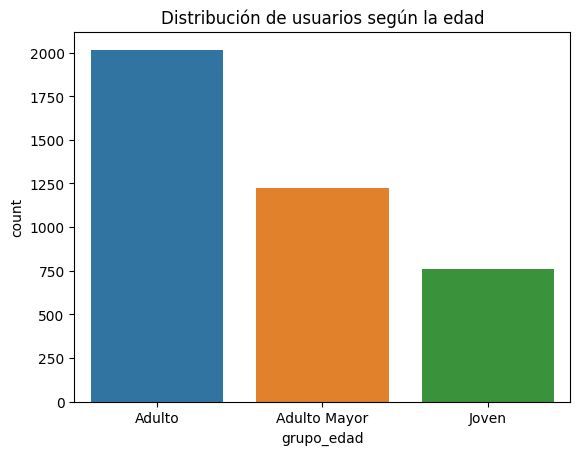

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución de usuarios según la edad')
plt.show()


---

## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo


⚠️
**Problemas detectados en los datos**

- Valores Atípicos: Se detectó el valor sentinel -999 en la columna de edad (age), lo que distorsiona los promedios, y 40 registros con el año 2026 en fechas de registro, lo cual no tiene relevancia ya que el análisis se debe dar únicamente con datos de hasta el año 2024.
- Calidad de Información Geográfica y de Uso: Existe un 11.7% (469 filas) de datos nulos en ciudad y 96 registros marcados con el símbolo "?", además de un alto porcentaje de nulos en duración y longitud de mensajes debido a la naturaleza técnica de cada tipo de registro.


🔍 **Segmentos por Edad**

- La mediana de edad real (excluyendo errores) es de 47 años, lo que indica que la mayoría de los usuarios son adultos con estabilidad económica.
- El rango de clientes se extiende hasta los 79 años, mostrando que la oferta debe ser accesible tanto para jóvenes como para adultos mayores an ambos tipos de planes.


📊 **Segmentos por Nivel de Uso**

- Se encuentran registros con mayor interacción en mensajes (22.092) frente a llamadas (17.908)
- El 65% de los usuarios (2.595) pertenecen al plan básico, mientras que el 35% (1.405) prefieren el plan Premium.


➡️ Esto sugiere que la mayoría de los usuarios de ConnectaTel buscan economía y servicios digitales (mensajes) sobre la telefonía tradicional, aunque existe un grupo valioso que consume servicios Premium de mayor costo.


💡 **Recomendaciones**

- Plan intermedio: Crear una oferta, enfocada en mensajería masiva para los usuarios del plan Básico que ya se quedan cortos. La idea es enganchar al segmento de los más jóvenes, que es el que más bajo, ofreciéndoles lo que realmente usan sin que tengan que saltar al precio del Premium.
- Plan familiar o senior: con usuarios de hasta 79 años, hay una oportunidad para ofrecer planes con beneficios compartidos. Un plan con minutos ilimitados hacia números frecuentes sería muy atractivo para este segmento senior que aún valora la voz.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`